<h2> Background </h2>

The dataset contains all the transactions occurring between 01/12/2009 and 09/12/2011 for an online retailer store.
The company mainly sells unique all-occasion gifts to wholesalers.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [2]:
file = pd.ExcelFile('online_retail_II.xlsx')
df = pd.read_excel(file,'Year 2009-2010')
df_2 = pd.read_excel(file,'Year 2010-2011')

In [3]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)

In [8]:
df_2['year'] = df_2['InvoiceDate'].apply(lambda x: x.year)
df_2['month'] = df_2['InvoiceDate'].apply(lambda x: x.month)
df_2['day'] = df_2['InvoiceDate'].apply(lambda x: x.day)
df_2['hour'] = df_2['InvoiceDate'].apply(lambda x: x.hour)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 12 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
year           525461 non-null int64
month          525461 non-null int64
day            525461 non-null int64
hour           525461 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 48.1+ MB


In [10]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
year                0
month               0
day                 0
hour                0
dtype: int64

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 12 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null datetime64[ns]
Price          541910 non-null float64
Customer ID    406830 non-null float64
Country        541910 non-null object
year           541910 non-null int64
month          541910 non-null int64
day            541910 non-null int64
hour           541910 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 49.6+ MB


In [12]:
df_2.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
year                0
month               0
day                 0
hour                0
dtype: int64

In [13]:
print('Percentage of missing values of Customer ID: ',df['Customer ID'].isnull().sum()/len(df)*100,'%')

print('Percentage of missing values of Description: ',df['Description'].isnull().sum()/len(df)*100,'%')

df = df.dropna()

df.isnull().sum()

Percentage of missing values of Customer ID:  20.53948818275762 %
Percentage of missing values of Description:  0.5572249891048051 %


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
year           0
month          0
day            0
hour           0
dtype: int64

In [14]:
print('Percentage of missing values of Customer ID: ',df_2['Customer ID'].isnull().sum()/len(df)*100,'%')

print('Percentage of missing values of Description: ',df_2['Description'].isnull().sum()/len(df)*100,'%')

df_2 = df_2.dropna()

df_2.isnull().sum()

Percentage of missing values of Customer ID:  32.3518563757682 %
Percentage of missing values of Description:  0.34823511378714067 %


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
year           0
month          0
day            0
hour           0
dtype: int64

In [15]:
df['Customer ID'] = df['Customer ID'].astype('int64')
df['Quantity'] = df['Quantity'].apply(lambda x: abs(x))

df['total amount'] = df['Quantity']*df['Price']

df = df[['Invoice','StockCode','Customer ID','Country','InvoiceDate','year','month','day','hour','Description',
         'Quantity','Price','total amount']]

df.head()

,Invoice,StockCode,Customer ID,Country,InvoiceDate,year,month,day,hour,Description,Quantity,Price,total amount
0,489434,85048,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.4
1,489434,79323P,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,PINK CHERRY LIGHTS,12,6.75,81.0
2,489434,79323W,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,WHITE CHERRY LIGHTS,12,6.75,81.0
3,489434,22041,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.8
4,489434,21232,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.0


In [37]:
df_2['Customer ID'] = df_2['Customer ID'].astype('int64')
df_2['Quantity'] = df_2['Quantity'].apply(lambda x: abs(x))

df_2['total amount'] = df_2['Quantity']*df_2['Price']

df_2 = df_2[['Invoice','StockCode','Customer ID','Country','InvoiceDate','year','month','day','hour','Description',
         'Quantity','Price','total amount']]


df_2.head()

,Invoice,StockCode,Customer ID,Country,InvoiceDate,year,month,day,hour,Description,Quantity,Price,total amount
0,536365,85123A,17850,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,71053,17850,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,WHITE METAL LANTERN,6,3.39,20.34
2,536365,84406B,17850,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,84029G,17850,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,84029E,17850,United Kingdom,2010-12-01 08:26:00,2010,12,1,8,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [39]:
df_full = pd.concat([df,df_2],axis =0, ignore_index=True)
df_full.head()

,Invoice,StockCode,Customer ID,Country,InvoiceDate,year,month,day,hour,Description,Quantity,Price,total amount
0,489434,85048,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.4
1,489434,79323P,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,PINK CHERRY LIGHTS,12,6.75,81.0
2,489434,79323W,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,WHITE CHERRY LIGHTS,12,6.75,81.0
3,489434,22041,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.8
4,489434,21232,13085,United Kingdom,2009-12-01 07:45:00,2009,12,1,7,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.0


### Exploratory Data Analysis

In [41]:
customer_pivot = pd.pivot_table(df_full,
                                values=['total amount'],
                                index=['Customer ID'],
                                columns=['year'],
                                fill_value = 0,
                                aggfunc=np.sum,
                                margins = True)

([<matplotlib.axis.XTick at 0x198bfeaa780>,
 <a list of 12 Text xticklabel objects>)

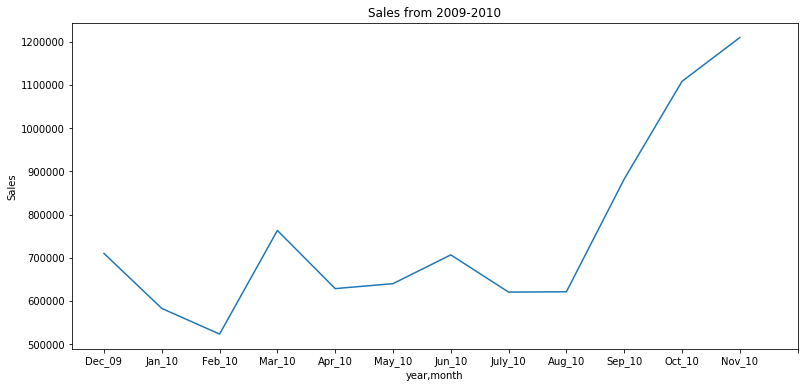

In [43]:
plt.figure(figsize = (13,6))
df.groupby(['year','month'])['total amount'].sum()[:-1].plot()
plt.title('Sales from 2009-2010')
plt.ylabel('Sales')
plt.xticks(np.arange(13),('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10',
                          'Sep_10','Oct_10','Nov_10'),rotation = 360)

([<matplotlib.axis.XTick at 0x198b8c4c438>,
 <a list of 12 Text xticklabel objects>)

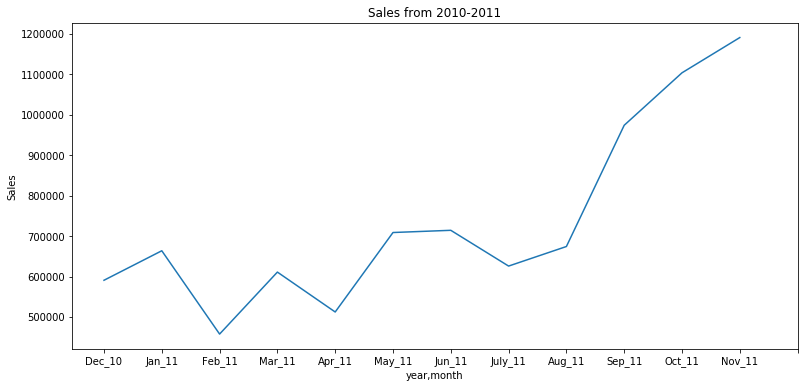

In [44]:
plt.figure(figsize = (13,6))
df_2.groupby(['year','month'])['total amount'].sum()[:-1].plot()
plt.title('Sales from 2010-2011')
plt.ylabel('Sales')
plt.xticks(np.arange(13),('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11',
                          'Sep_11','Oct_11','Nov_11'),rotation = 360)

([<matplotlib.axis.XTick at 0x198b4e73a90>,
 <a list of 24 Text xticklabel objects>)

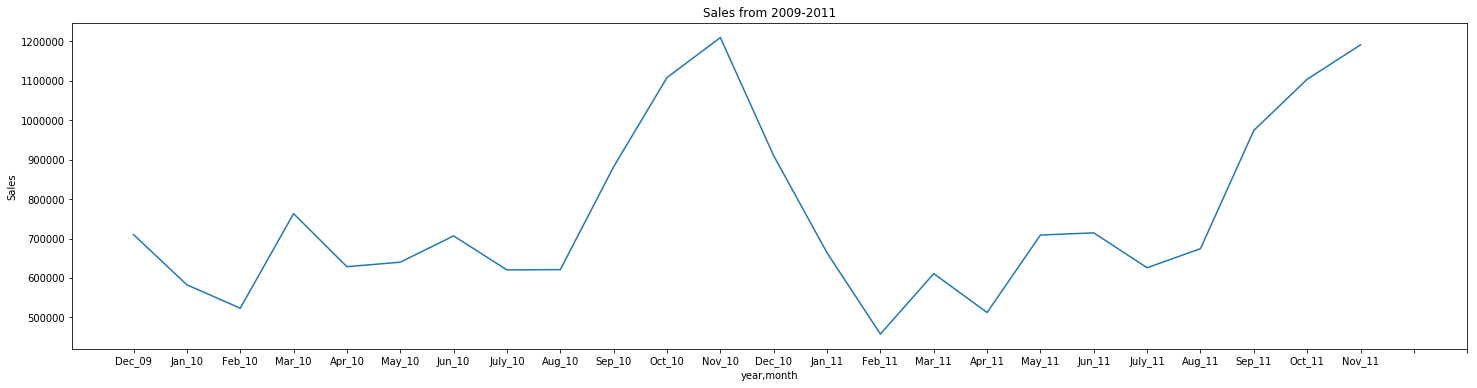

In [48]:
plt.figure(figsize = (25,6))
df_full.groupby(['year','month'])['total amount'].sum()[:-1].plot()
plt.title('Sales from 2009-2011')
plt.ylabel('Sales')
plt.xticks(np.arange(26),('Dec_09','Jan_10','Feb_10',
                          'Mar_10','Apr_10','May_10',
                          'Jun_10','July_10','Aug_10',
                          'Sep_10','Oct_10','Nov_10',
                          'Dec_10','Jan_11','Feb_11',
                          'Mar_11','Apr_11','May_11',
                          'Jun_11','July_11','Aug_11',
                          'Sep_11','Oct_11','Nov_11'),rotation = 360)

#### Top 5 customers

In [52]:
Customer_order = df_full.groupby(['Customer ID','Country'],as_index=False)
Top5_customers = Customer_order['total amount'].sum().sort_values(by='total amount',ascending = False).head(5)
Top5_customers

,Customer ID,Country,total amount
5769,18102,United Kingdom,619428.08
2313,14646,Netherlands,533862.97
4113,16446,United Kingdom,336951.10
1823,14156,EIRE,331328.05
2578,14911,EIRE,321696.73


##### No.1 Customer

In [62]:
Max_customer_ID = Top5_customers['Customer ID'].values[0]
Max_customer = df_full[df_full['Customer ID'] == Max_customer_ID]

([<matplotlib.axis.XTick at 0x198c6a97780>,
 <a list of 12 Text xticklabel objects>)

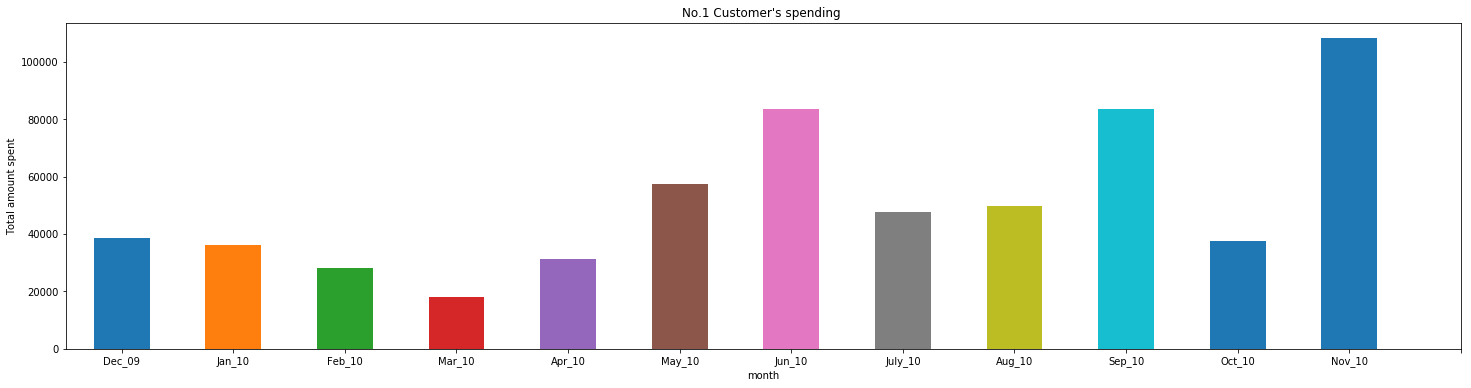

In [65]:
plt.figure(figsize = (25,6))
Max_customer.groupby('month')['total amount'].sum().plot(kind='bar')
plt.title('No.1 Customer\'s spending ')
plt.ylabel('Total amount spent')
plt.xticks(np.arange(13),('Dec_09','Jan_10','Feb_10',
                          'Mar_10','Apr_10','May_10',
                          'Jun_10','July_10','Aug_10',
                          'Sep_10','Oct_10','Nov_10'),rotation = 360)

#### Customer orders

In [67]:
Customer_order['Invoice'].count().sort_values(by='Invoice',ascending = False).head(5)

,Customer ID,Country,Invoice
5508,17841,United Kingdom,13097
2578,14911,EIRE,11613
415,12748,United Kingdom,7307
2273,14606,United Kingdom,6709
1763,14096,United Kingdom,5128


([<matplotlib.axis.XTick at 0x198c44a0eb8>,
 <a list of 25 Text xticklabel objects>)

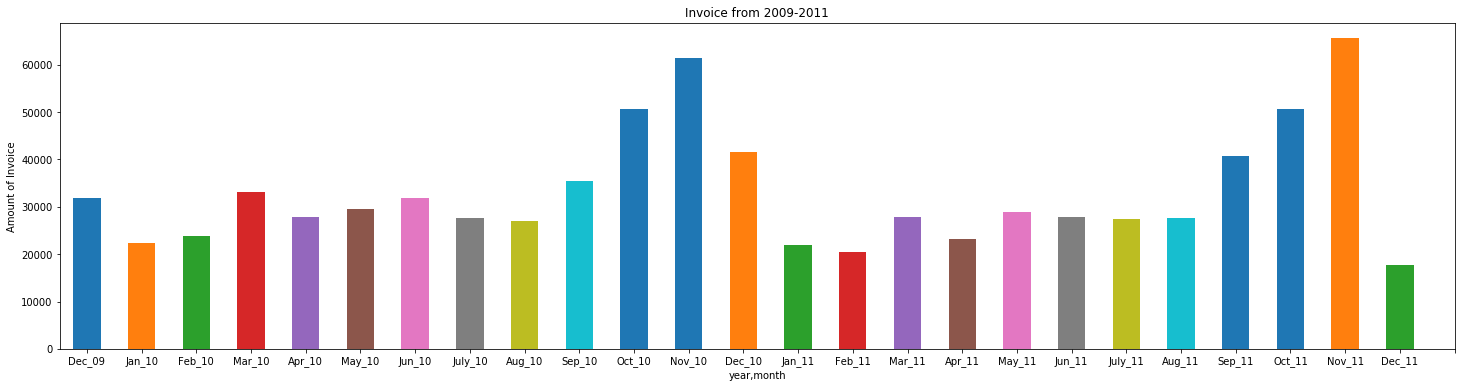

In [69]:




plt.figure(figsize = (25,6))
df_full.groupby(['year','month'])['Invoice'].count().plot(kind = 'bar')
plt.title('Invoice from 2009-2011')
plt.ylabel('Amount of Invoice')
plt.xticks(np.arange(26),('Dec_09','Jan_10','Feb_10',
                          'Mar_10','Apr_10','May_10',
                          'Jun_10','July_10','Aug_10',
                          'Sep_10','Oct_10','Nov_10',
                          'Dec_10','Jan_11','Feb_11',
                          'Mar_11','Apr_11','May_11',
                          'Jun_11','July_11','Aug_11',
                          'Sep_11','Oct_11','Nov_11','Dec_11'),rotation = 360)

### RFM model

#### Recency

In [436]:
recency = df.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
recency['Last_Purchase_Date'] = recency['InvoiceDate'].apply(lambda x: date(x.year,x.month,x.day))
recency.drop('InvoiceDate',axis=1,inplace=True)

now = date(year = int(2011), month = int(1), day = int(1))
recency['recency'] = now-recency['Last_Purchase_Date']

recency.drop('Last_Purchase_Date',axis = 1,inplace = True)

recency.head()

,Customer ID,recency
0,12346,89 days
1,12347,25 days
2,12348,96 days
3,12349,65 days
4,12351,33 days


In [76]:
recency = df_full.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
recency['Last_Purchase_Date'] = recency['InvoiceDate'].apply(lambda x: date(x.year,x.month,x.day))
recency.drop('InvoiceDate',axis=1,inplace=True)

now = date(year = int(2012), month = int(1), day = int(1))
recency['recency'] = now-recency['Last_Purchase_Date']

recency.drop('Last_Purchase_Date',axis = 1,inplace = True)

recency.head()

,Customer ID,recency
0,12346,348 days
1,12347,25 days
2,12348,98 days
3,12349,41 days
4,12350,333 days


#### Frequency

In [441]:
frequency = df.groupby('Customer ID',as_index=False)['Invoice'].count()
frequency.columns=['Customer ID','frequency']

frequency.head()

,Customer ID,frequency
0,12346,46
1,12347,71
2,12348,20
3,12349,107
4,12351,21


In [77]:
frequency = df_full.groupby('Customer ID',as_index=False)['Invoice'].count()
frequency.columns=['Customer ID','frequency']

frequency.head()

,Customer ID,frequency
0,12346,48
1,12347,253
2,12348,51
3,12349,180
4,12350,17


#### Monetary 

In [442]:
monetary = df.groupby('Customer ID',as_index=False)['total amount'].sum()
monetary.columns=['Customer ID','monetary']
monetary.head()

,Customer ID,monetary
0,12346,810.40
1,12347,1323.32
2,12348,222.16
3,12349,2695.29
4,12351,300.93


In [78]:
monetary = df_full.groupby('Customer ID',as_index=False)['total amount'].sum()
monetary.columns=['Customer ID','monetary']
monetary.head()

,Customer ID,monetary
0,12346,155177.60
1,12347,5633.32
2,12348,2019.40
3,12349,4452.84
4,12350,334.40


#### Full RFM model

In [79]:
RF = recency.merge(frequency,left_on='Customer ID',right_on='Customer ID')
RFM = RF.merge(monetary,left_on='Customer ID',right_on='Customer ID')

RFM['recency'] = RFM['recency'].apply(lambda x:x.days)
RFM.set_index('Customer ID',inplace=True)

In [80]:
RFM.head()

,recency,frequency,monetary
Customer ID,,,
12346,348,48,155177.60
12347,25,253,5633.32
12348,98,51,2019.40
12349,41,180,4452.84
12350,333,17,334.40


#### K-Mean clustering

In [81]:
RFM_copy = RFM.copy()

sc = StandardScaler()
RFM_copy = sc.fit_transform(RFM_copy)

In [82]:
score_list = []
num_k = np.arange(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_copy)
    score = kmeans.score(RFM_copy)
    score_list.append(score)

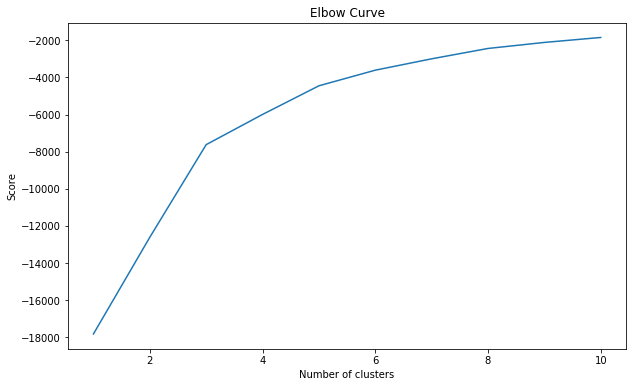

In [83]:
plt.figure(figsize=(10,6))
plt.plot(num_k,score_list)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [84]:
kmeans = KMeans(n_clusters=6).fit(RFM_copy)

RFM_copy = pd.DataFrame(RFM_copy)
RFM_copy['cluster'] = kmeans.labels_

In [85]:
RFM['cluster']=RFM_copy['cluster'].values

In [86]:
#cluster_0 = RFM[RFM['cluster']==0]
#cluster_1 = RFM[RFM['cluster']==1]
#cluster_2 = RFM[RFM['cluster']==2]

cluster_0 = RFM[RFM['cluster']==0]
cluster_1 = RFM[RFM['cluster']==1]
cluster_2 = RFM[RFM['cluster']==2]
cluster_3 = RFM[RFM['cluster']==3]
cluster_4 = RFM[RFM['cluster']==4]
cluster_5 = RFM[RFM['cluster']==5]

In [87]:
cluster_0.describe()

,recency,frequency,monetary,cluster
count,3639.000000,3639.000000,3639.000000,3639.0
mean,97.110470,111.092333,2135.266148,0.0
std,73.962008,107.470334,2829.456625,0.0
min,23.000000,1.000000,0.000000,0.0
25%,40.000000,30.000000,517.225000,0.0
50%,69.000000,72.000000,1179.870000,0.0
75%,131.500000,161.000000,2666.785000,0.0
max,314.000000,506.000000,33826.360000,0.0


In [88]:
cluster_1.describe()

,recency,frequency,monetary,cluster
count,1945.000000,1945.000000,1945.000000,1945.0
mean,498.300257,42.538817,833.530063,1.0
std,123.831798,57.268299,2243.665418,0.0
min,293.000000,1.000000,0.000000,1.0
25%,406.000000,11.000000,190.470000,1.0
50%,460.000000,24.000000,382.310000,1.0
75%,598.000000,51.000000,837.530000,1.0
max,761.000000,630.000000,49187.600000,1.0


In [89]:
cluster_2.describe()

,recency,frequency,monetary,cluster
count,4.00,4.000000,4.000000,4.0
mean,23.75,9681.500000,122201.267500,2.0
std,0.50,3155.436526,134132.654954,0.0
min,23.00,6709.000000,31627.740000,2.0
25%,23.75,7157.500000,55328.422500,2.0
50%,24.00,9460.000000,67740.300000,2.0
75%,24.00,11984.000000,134613.145000,2.0
max,24.00,13097.000000,321696.730000,2.0


In [90]:
cluster_3.describe()

,recency,frequency,monetary,cluster
count,336.000000,336.000000,336.000000,336.0
mean,48.005952,790.419643,15155.616768,3.0
std,50.586648,421.516097,14831.971362,0.0
min,23.000000,5.000000,1468.550000,3.0
25%,26.000000,535.750000,6459.392500,3.0
50%,32.000000,671.500000,10136.275000,3.0
75%,46.000000,933.500000,17446.035000,3.0
max,395.000000,3255.000000,93139.260000,3.0


In [91]:
cluster_4.describe()

,recency,frequency,monetary,cluster
count,3.000000,3.000000,3.000000,3.0
mean,26.333333,3029.333333,494873.033333,4.0
std,4.932883,1702.798089,147954.615313,0.0
min,23.000000,1068.000000,331328.050000,4.0
25%,23.500000,2479.000000,432595.510000,4.0
50%,24.000000,3890.000000,533862.970000,4.0
75%,28.000000,4010.000000,576645.525000,4.0
max,32.000000,4130.000000,619428.080000,4.0


In [92]:
cluster_5.describe()

,recency,frequency,monetary,cluster
count,15.000000,15.000000,15.000000,15.0
mean,52.200000,1597.733333,158760.338667,5.0
std,82.560973,1696.873910,66689.737676,0.0
min,23.000000,5.000000,73208.670000,5.0
25%,25.000000,351.000000,120145.390000,5.0
50%,26.000000,990.000000,145647.450000,5.0
75%,37.500000,2501.000000,167249.360000,5.0
max,348.000000,5128.000000,336951.100000,5.0


Text(0.5,1,'Boxplot of recency for each cluster')

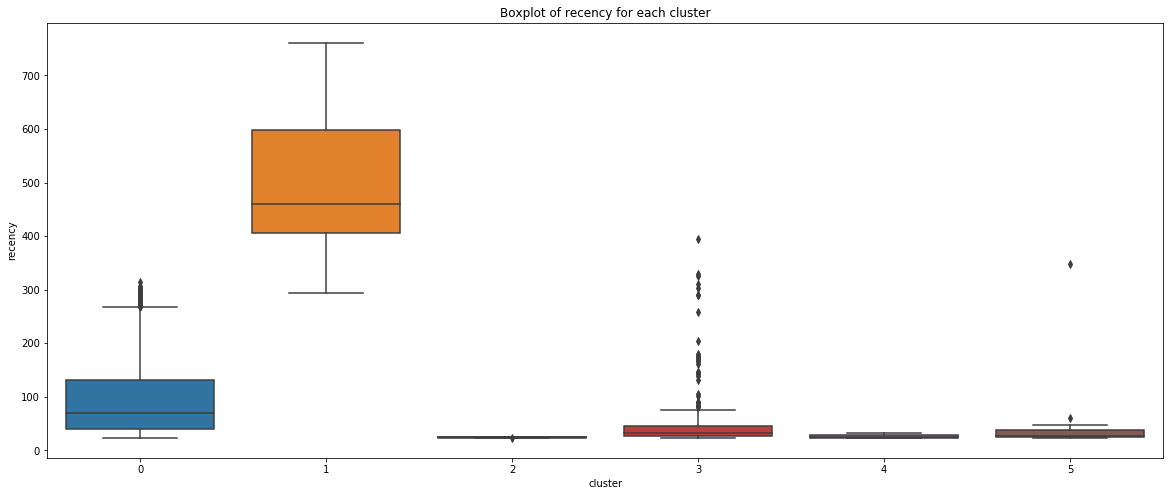

In [93]:
plt.figure(figsize=(20,8))
sns.boxplot(RFM['cluster'],RFM['recency'])
plt.title('Boxplot of recency for each cluster')

Text(0.5,1,'Boxplot of frequency for each cluster')

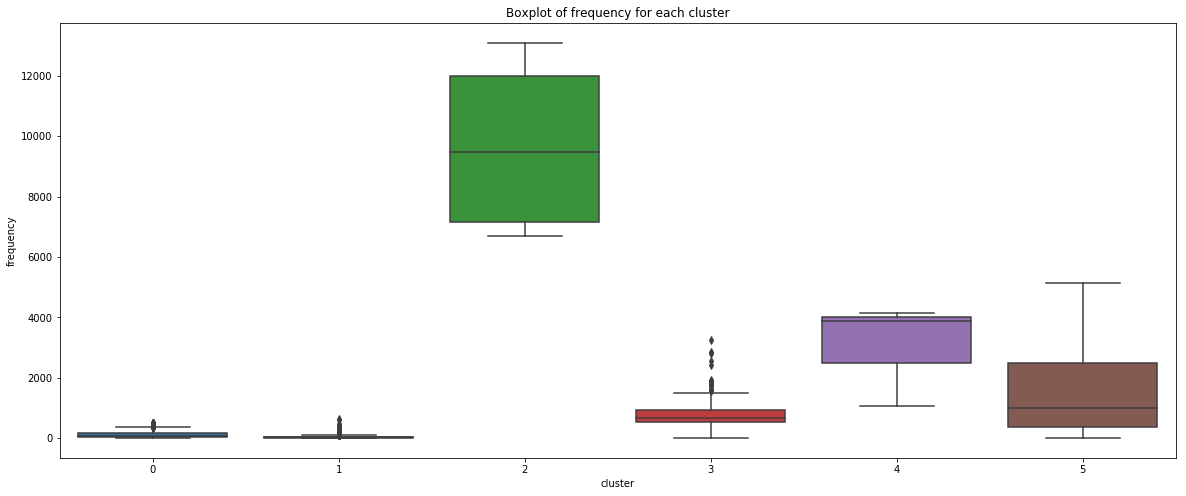

In [94]:
plt.figure(figsize=(20,8))
sns.boxplot(RFM['cluster'],RFM['frequency'])
plt.title('Boxplot of frequency for each cluster')

Text(0.5,1,'Boxplot of monetary for each cluster')

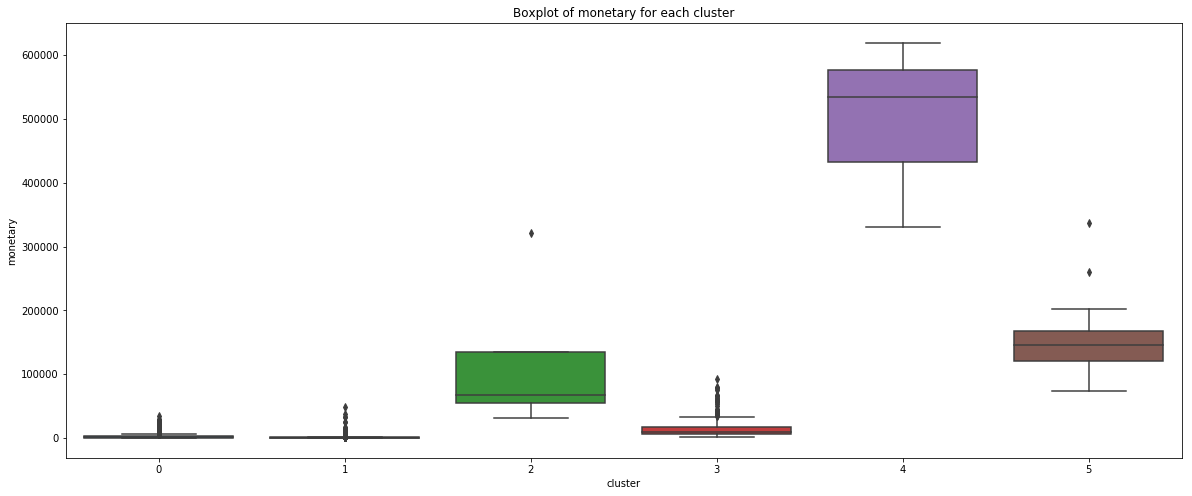

In [95]:
plt.figure(figsize=(20,8))
sns.boxplot(RFM['cluster'],RFM['monetary'])
plt.title('Boxplot of monetary for each cluster')

<h4>Observation</h4>

Customers in cluster 0 may be the second targets for retailers because they are frequent buyers, though they don't have high monetary values

Customers in cluster 1 may be likely to lose as most of their last purchased dates are more than 100 days. Yet they don't generate much monetary values

Customers in cluster 2, 4 and 5 are the most desirable but they are rare due to small sample size

Customers in cluster 3 are the majority of buyers so they have the highest distribution 


#### RFM Score

In [96]:
Quantile = RFM.iloc[:,:-1].quantile([.25,.5,.75]).to_dict()
Quantile

{'recency': {0.25: 47.0, 0.5: 118.5, 0.75: 404.0},
 'frequency': {0.25: 21.0, 0.5: 53.0, 0.75: 144.0},
 'monetary': {0.25: 347.99750000000006,
  0.5: 906.1649999999998,
  0.75: 2363.1400000000017}}

In [97]:
# For R score, lower the score the more valuable the customer is 
def RScore(R,re,q):
    if R <= q[re][0.25]:
        return 4
    elif R <= q[re][0.50]:
        return 3
    elif R <= q[re][0.75]: 
        return 2
    else:
        return 1

# For F&M score, higher the score the more valuable the customer is    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [98]:
RFM['R_score'] = RFM['recency'].apply(lambda x: RScore(x,'recency',Quantile))
RFM['F_score'] = RFM['frequency'].apply(lambda x: FMScore(x,'frequency',Quantile))
RFM['M_score'] = RFM['monetary'].apply(lambda x: FMScore(x,'monetary',Quantile))

In [99]:
RFM['RFMScore'] = RFM['R_score'].map(str)+RFM['F_score'].map(str)+RFM['M_score'].map(str)
RFM.head()

,recency,frequency,monetary,cluster,R_score,F_score,M_score,RFMScore
Customer ID,,,,,,,,
12346,348,48,155177.60,5,2,2,4,224
12347,25,253,5633.32,0,4,4,4,444
12348,98,51,2019.40,0,3,2,3,323
12349,41,180,4452.84,0,4,4,4,444
12350,333,17,334.40,1,2,1,1,211


In [100]:
RFM.to_excel('E-Commerce_data_RFM_model.xlsx')

### Churn rate analysis

In [101]:
def SetMonth(x):
    return datetime(x.year,x.month,1)

In [103]:
df_copy = df_full

df_copy['Invoice_month'] = df_copy['InvoiceDate'].apply(SetMonth)

df_copy['Cohort_month'] = df_copy.groupby('Customer ID')['Invoice_month'].transform('min')

In [104]:
year_diff = df_copy['Invoice_month'].apply(lambda x: x.year) - df_copy['Cohort_month'].apply(lambda x: x.year)
month_diff = df_copy['Invoice_month'].apply(lambda x: x.month) - df_copy['Cohort_month'].apply(lambda x: x.month)
df_copy['Cohort_index'] = year_diff*12+month_diff+1

In [106]:
df_Cohort = df_copy.groupby(['Cohort_month', 'Cohort_index'])
Cohort_data = df_Cohort['Customer ID'].nunique()
Cohort_data= Cohort_data.reset_index()

In [107]:
Cohort_pivot = Cohort_data.pivot(index='Cohort_month', columns='Cohort_index', values='Customer ID')
Cohort_pivot

Cohort_index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12-01,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
2010-02-01,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
2010-03-01,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
2010-04-01,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
Cohort_bases = Cohort_pivot.iloc[:,0]
churn = 1- Cohort_pivot.divide(Cohort_bases, axis=0)
churn.round(2) * 100
churn.index = churn.index.astype('str')
#churn.round(2) * 100

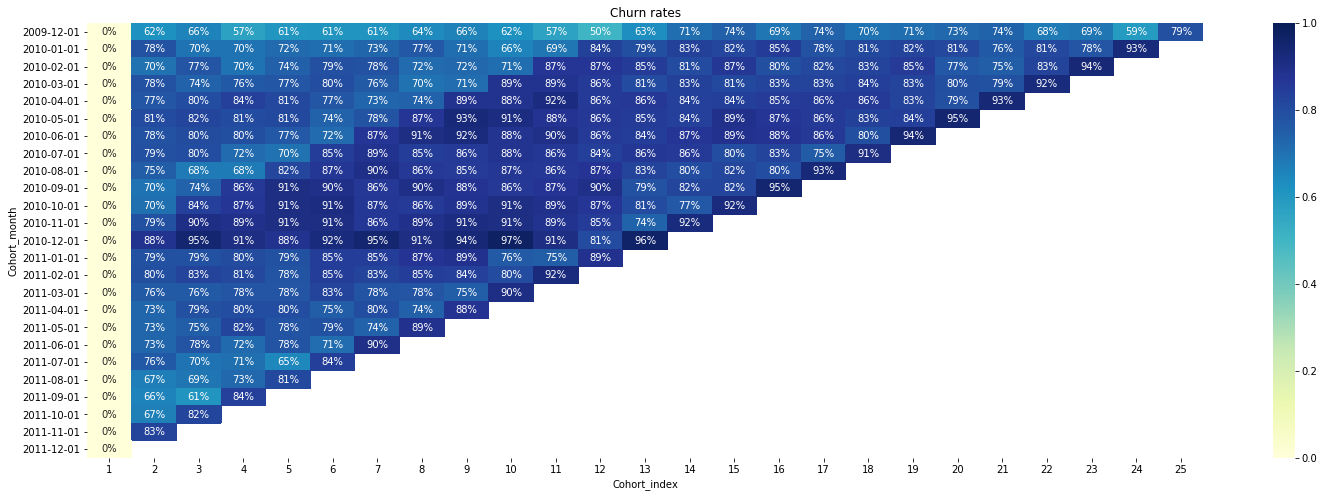

In [116]:
plt.figure(figsize=(25, 8))
plt.title('Churn rates')
sns.heatmap(data = churn,annot = True, fmt = '.0%', vmin = 0.0, vmax = 1, cmap ='YlGnBu')
plt.show()